# 1. Реализация алгоритмов KNN и SVM

## K ближайших соседей

Для разработки алгоритма использовались следующие библиотеки и фукнции:
- math;
- random;
- matplotlib;
- sklearn.datasets.

Используемые вводные данные:
* `classes_num` - число классов (по умолчанию 4)
* `size_sample` - размер выборки (количество точек на все число классов)
* `k` - число рассматриваемых ближайших точек для исследуемой для определения класса последней
* `test_percent` - отношение тестовой выборки к тренировочной.

### Генерирование данных

Для генерации использован метод `make_blobs` библиотеки sklearn (библиотека с реализацией ряда алгоритмов машинного обучения). 

```
def generate_data(classes_num, sample_size, random_seed):
    x, y = datasets.make_blobs(n_samples=sample_size,
                               centers=classes_num,
                               n_features=2,
                               cluster_std=1.2,
                               random_state=random_seed)
    data = []
    for i in range(len(x)):
        data.append([[x[i][0], x[i][1]], y[i]])
    return data, x, y
```

Функции генерирования классов данных передается число данных и размер выборки, который в равных частях поделится между всеми классами. На выходе получаем 2 списка:
- x - с двумя координатами (x и у) для каждого элемента;
- у - с указанием номера класса для каждого элемента данных.

Результат функции - итоговый список с координатами и классом для каждой сгенерированной точки.

График распределения классов на плоскости:

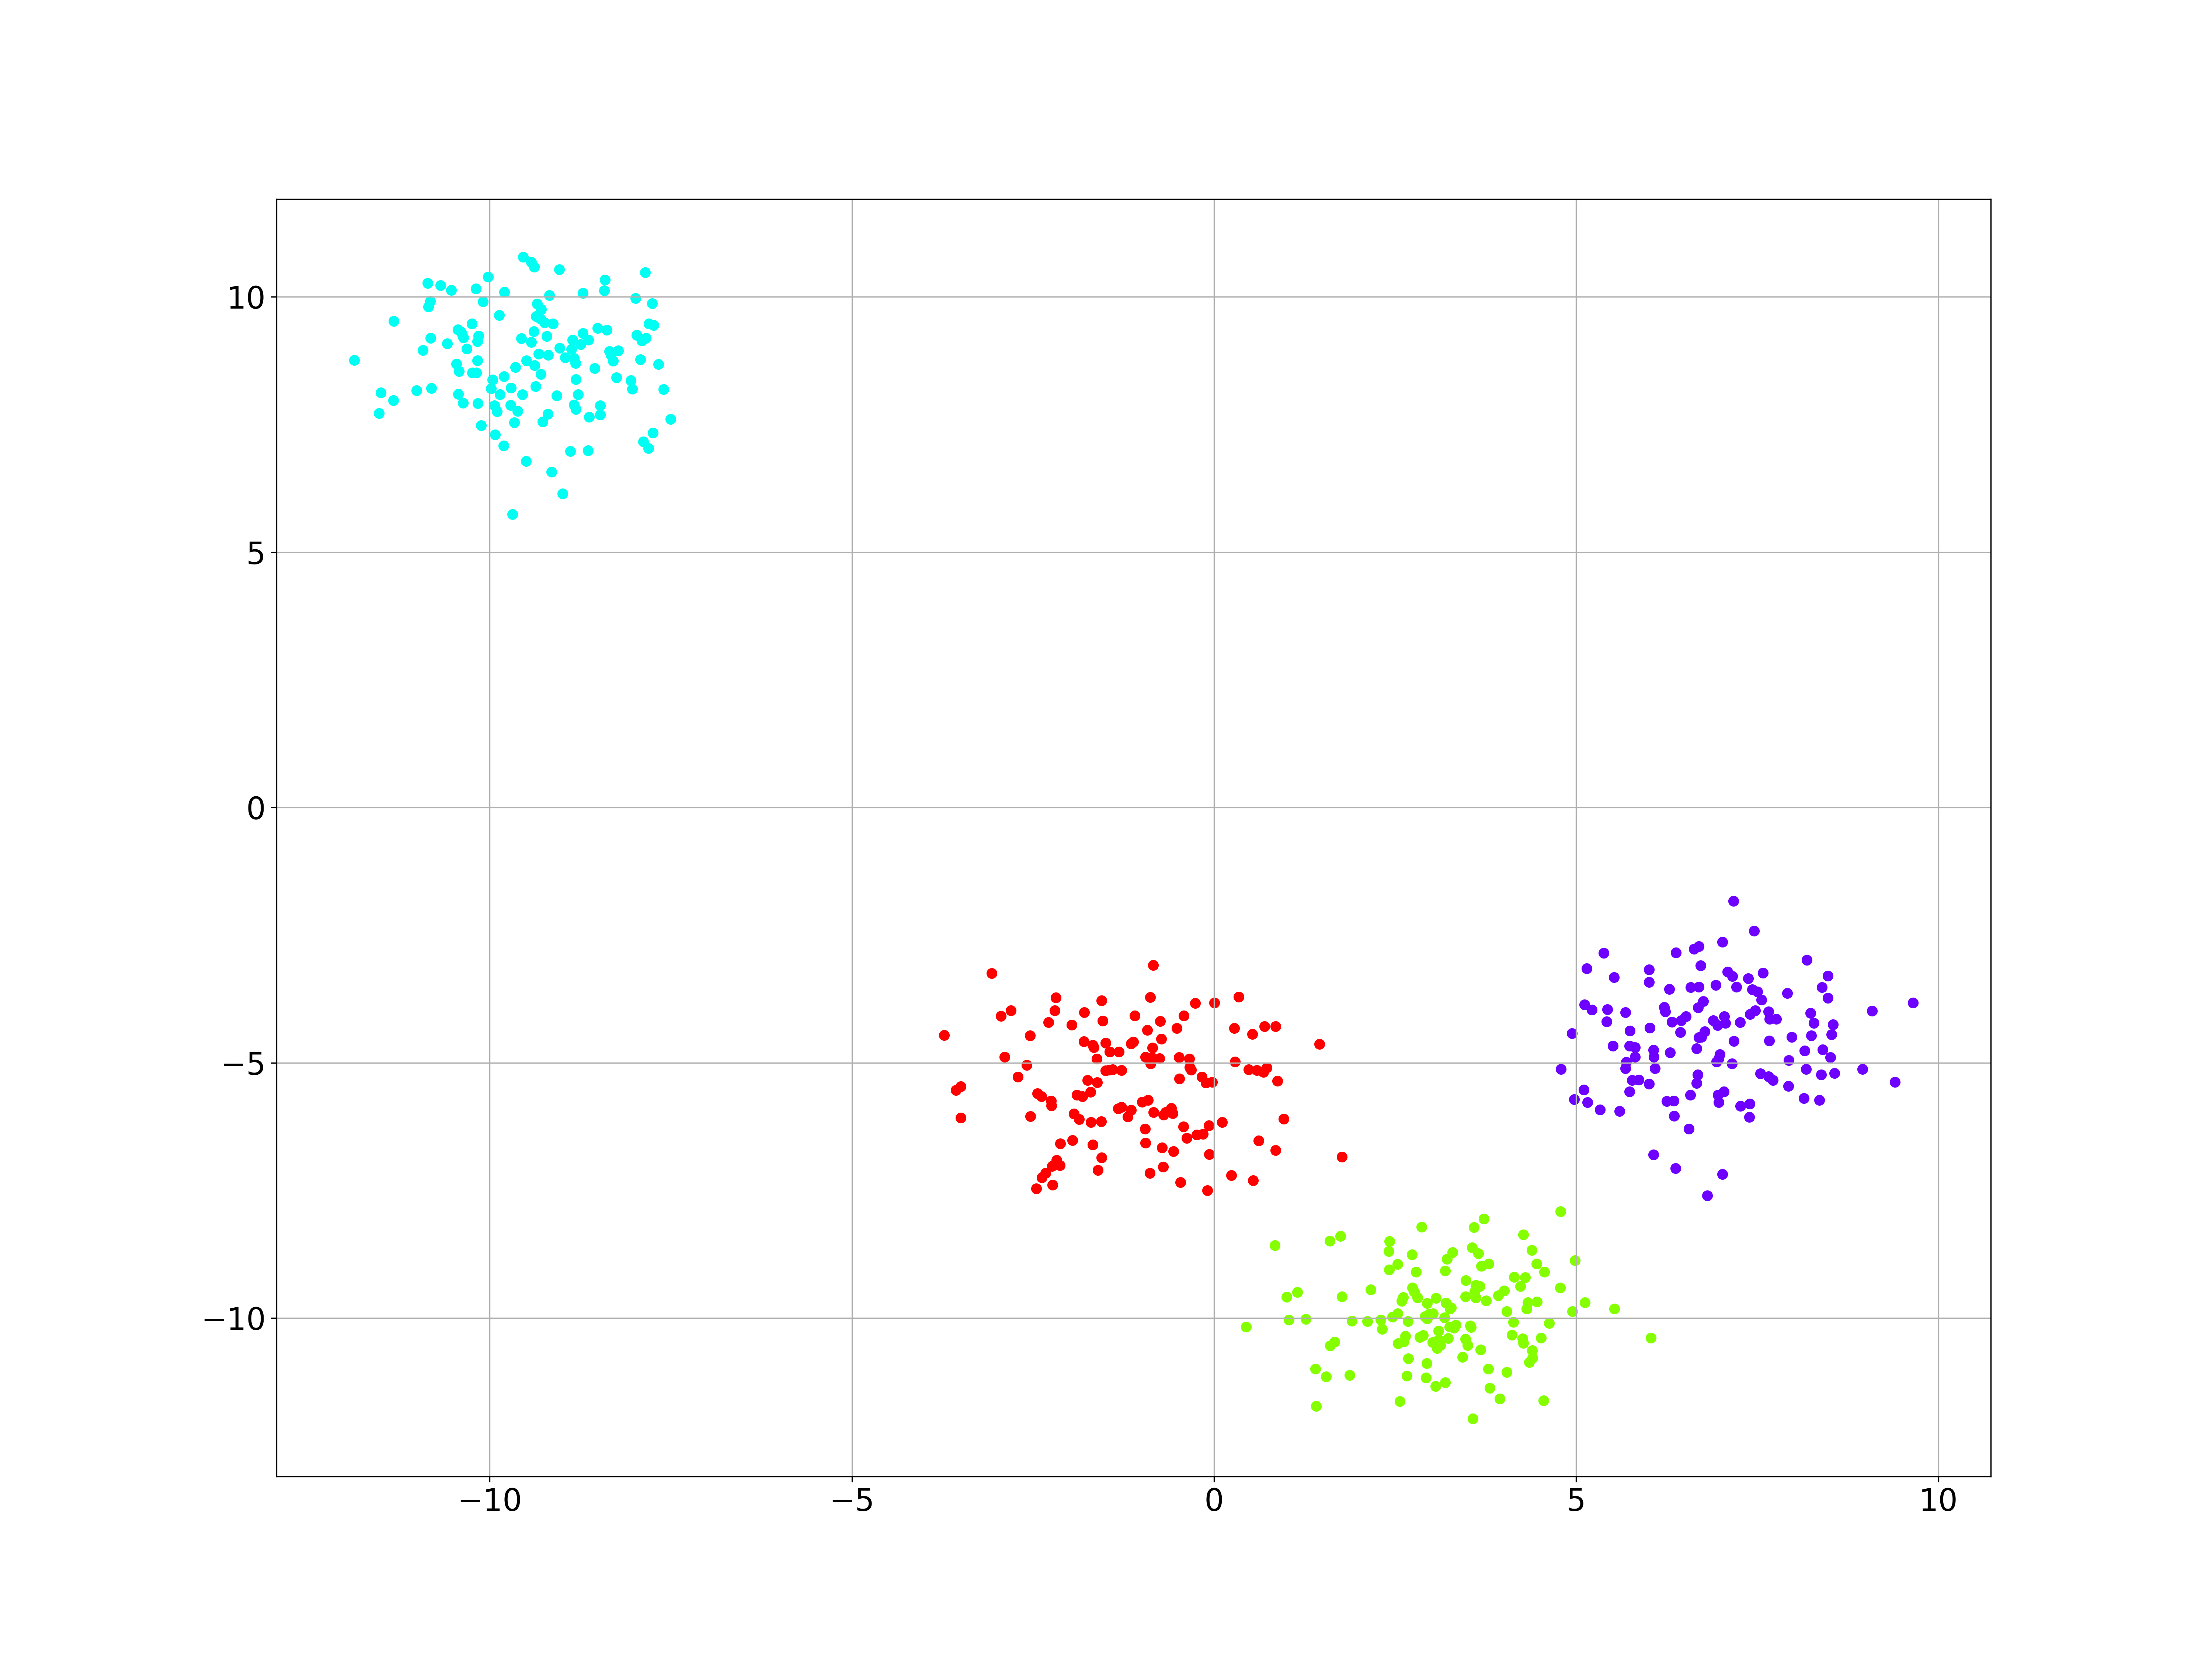

### Подготовка датасета

Для разделения датасета на тренировочную и тестовую выборки используется функция `data_split`. Функция принимает значение `test_percent`, затем перебирает датасет и случайным образом распределяет его строчки в выборки.

```
def data_split(data, test_percent):
    train_data, test_data = [], []
    for point in data:
        if random.random() < test_percent:
            test_data.append(point)
        else:
            train_data.append(point)
    return train_data, test_data
```

### Определение k ближайших соседей (функция расстояния)

Для определения ближайших точек используется стандартная формула для расчета расстояния.

```
def distance(point_1, point_2):
    answer = math.sqrt((point_1[0]-point_2[0])**2 + (point_1[1]-point_2[1])**2)
    return answer
```

### KNN

Алгоритм проходится по каждому элементу тестовых данных и высчитывает расстояние для каждой точки из тренировочной выборки, затем определяет k (по умолчанию равное 3) ближайших, точке присваивается номер, встречающийся у ближайших чаще всего. Функция возвращает список индексов класса для точек из тестового набора.

```
def knn(train_data, test_data, k, classes_num):
    test_labels = []
    for point in test_data:
        test_distance = [
            [distance(point, train_data[i][0]), train_data[i][1]] for i in range(len(train_data))
        ]
        neighbors = [0 for i in range(classes_num)]
        for d in sorted(test_distance)[0:k]:
            neighbors[d[1]] += 1
        test_labels.append(sorted(zip(neighbors, range(classes_num)), reverse=True)[0][1])
    return test_labels
```

### Оценка работы алгоритма

Для оценки точности работы алгоритма взято отношение совпавших с фактом предсказаний классов к общему размеру тестовой выборки. 

Для оценки длительности работы алгоримта использовался модуль `datetime`, засекающий время с момента генерации данных, до вывода подсчитанной точности.

```
def calculate_accuracy(classes_num, k, test_split_data, train_split_data):
    test_data = [test_split_data[i][0] for i in range(len(test_split_data))]
    test_data_labels = knn(train_split_data, test_data, k, classes_num)
    sum_correct_answer = sum( [int(test_data_labels[i] == test_split_data[i][1]) for i in range(len(test_split_data))] )
    print('Точность: ', sum_correct_answer / float(len(test_split_data)))
```

## SVM

Использовались следующие библиотеки:
- **pandas** - для создания единого датасета;
- **matplotlib** - для создания графика с изображением классов точек на плоскости;
- **sklearn.datasets** - для генерации классов точек;
- sklearn.model_selection.**train_test_split** - для разделения датасета на тренировочную и тестовую выборку;
- **sklearn.svm** - для реализации классификатора с помощью метода опорных векторов;
- sklearn.multiclass.**OneVsRestClassifier** - для реализации стратегии "один против всех" для числа классов > 2.

### Генерация классов и датасета

Использовась та же функция, что и в алгоритме для KNN. Единственное отличие - формирование единого датасета через библиотеку pandas.

In [15]:
import pandas as pd
from sklearn import datasets

x, y = datasets.make_blobs(n_samples=500,
                           centers=2,
                           n_features=2,
                           cluster_std=1.2)
df = pd.DataFrame(dict(x=x[:, 0], y=x[:, 1], label=y))
df.head()

,x,y,label
0,-6.181604,-5.467510,0
1,-5.365096,-5.671531,0
2,-2.391171,-6.203738,1
3,-3.193624,-5.459674,0
4,-3.983758,-5.132351,0


Для разделения датасета на тренировочную и тестовую выборку использовалась следующая функция:
```
def split_data(df):
    return train_test_split(df.drop('label', axis=1),
                            df['label'],
                            test_size=0.5)
```

### SVM

Использовся класс SVM библиотек sklearn. Сначала создавался экзепляр класса,  затем производилось обучение модели на признаках (`x_train`) и целевой переменной (`y_train`) тренировочной выборки. В качестве результата функция возвращает список прогнозируемых классов для точек из тестового набора.

```
def svc(x_train, y_train, x_test):
    clf = OneVsRestClassifier(SVC(kernel='poly'))
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    return y_pred
```

### Оценка работы алгоритма

Для оценки точности использовалась та же метрика, что и в алгоритме KNN: отношение количества совпавших с фактом прогнозов к общему числу прогнозов.

Для оценки длительности работы алгоримта использовался модуль datetime, засекающий время с момента генерации данных, до вывода подсчитанной точности (без учета построения схемы для классов).

# 2. Результаты сравнения KNN и SVM

### Первый эксперимент

**Входные данные:**

- Количество классов = 5 
- Общий размер выборки = 10000 (2000 элементов в каждом классе)
- Отношение тестовой выборки к тренировочной = 0,5
- Cлучайное зерно для генерации классов = 100
- Количество ближайших точек для определения класса данной = 3
- Ядро для SVM = linear

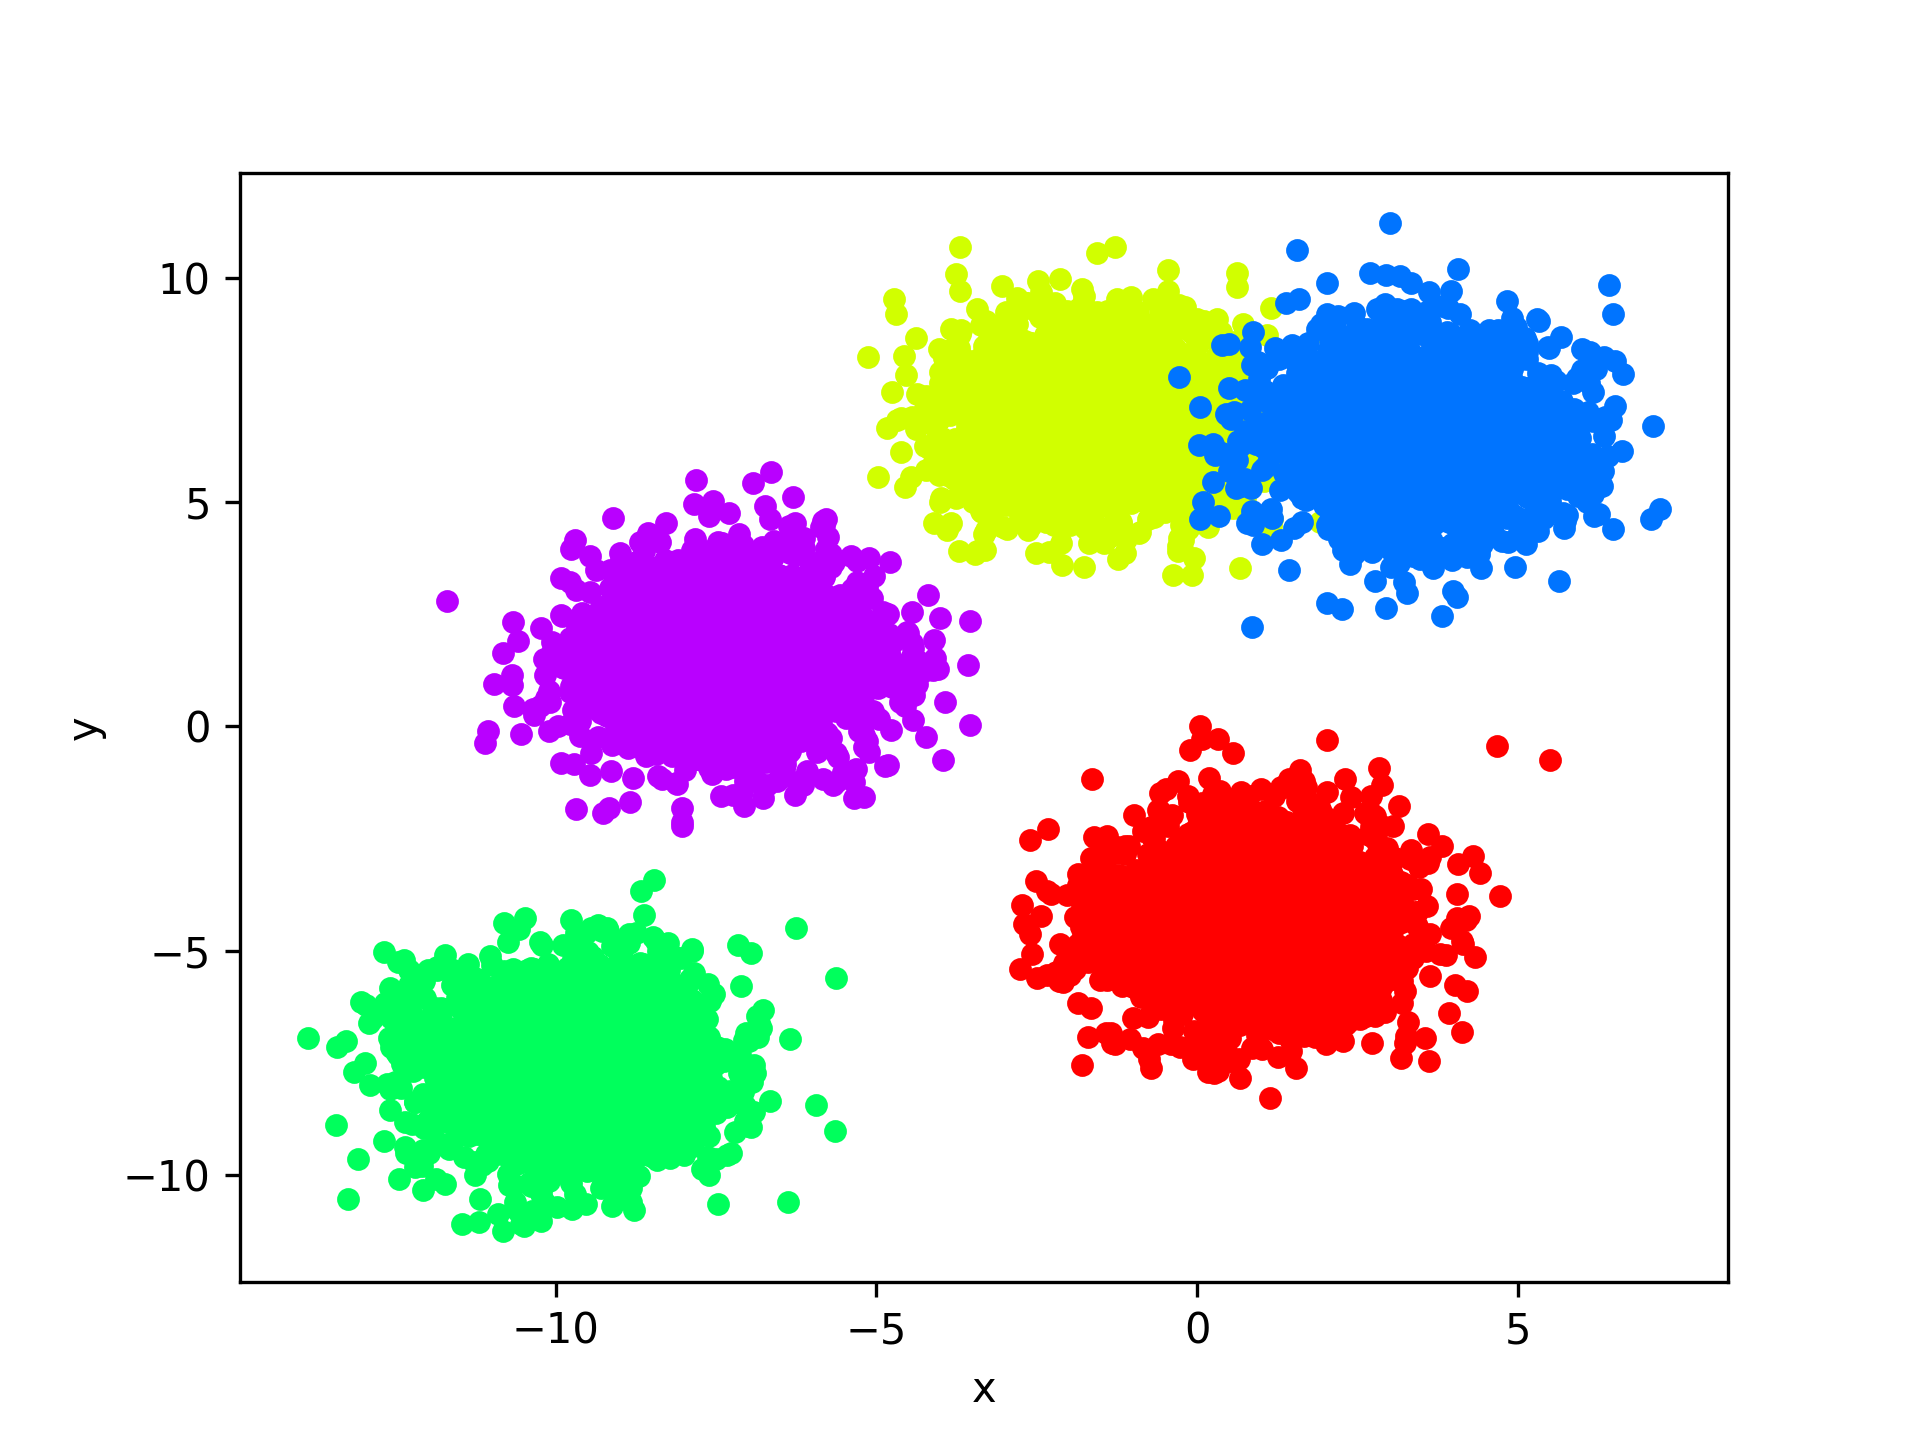

    
**Результаты:**

**Метод опорных векторов:** 
- Точность: 0,991375
- Длительность: 00:00:00.984000


**K ближайших соседей:**
- Точность: 0,992115
- Длительность: 00:00:45.875000

### Второй эксперимент

**Входные данные:**

- Количество классов = 10
- Общий размер выборки =  8 000 (800 элементов в каждом классе)
- Отношение тестовой выборки к тренировочной = 0,8
- Cлучайное зерно для генерации классов = 100
- Количество ближайших точек для определения класса данной = 3

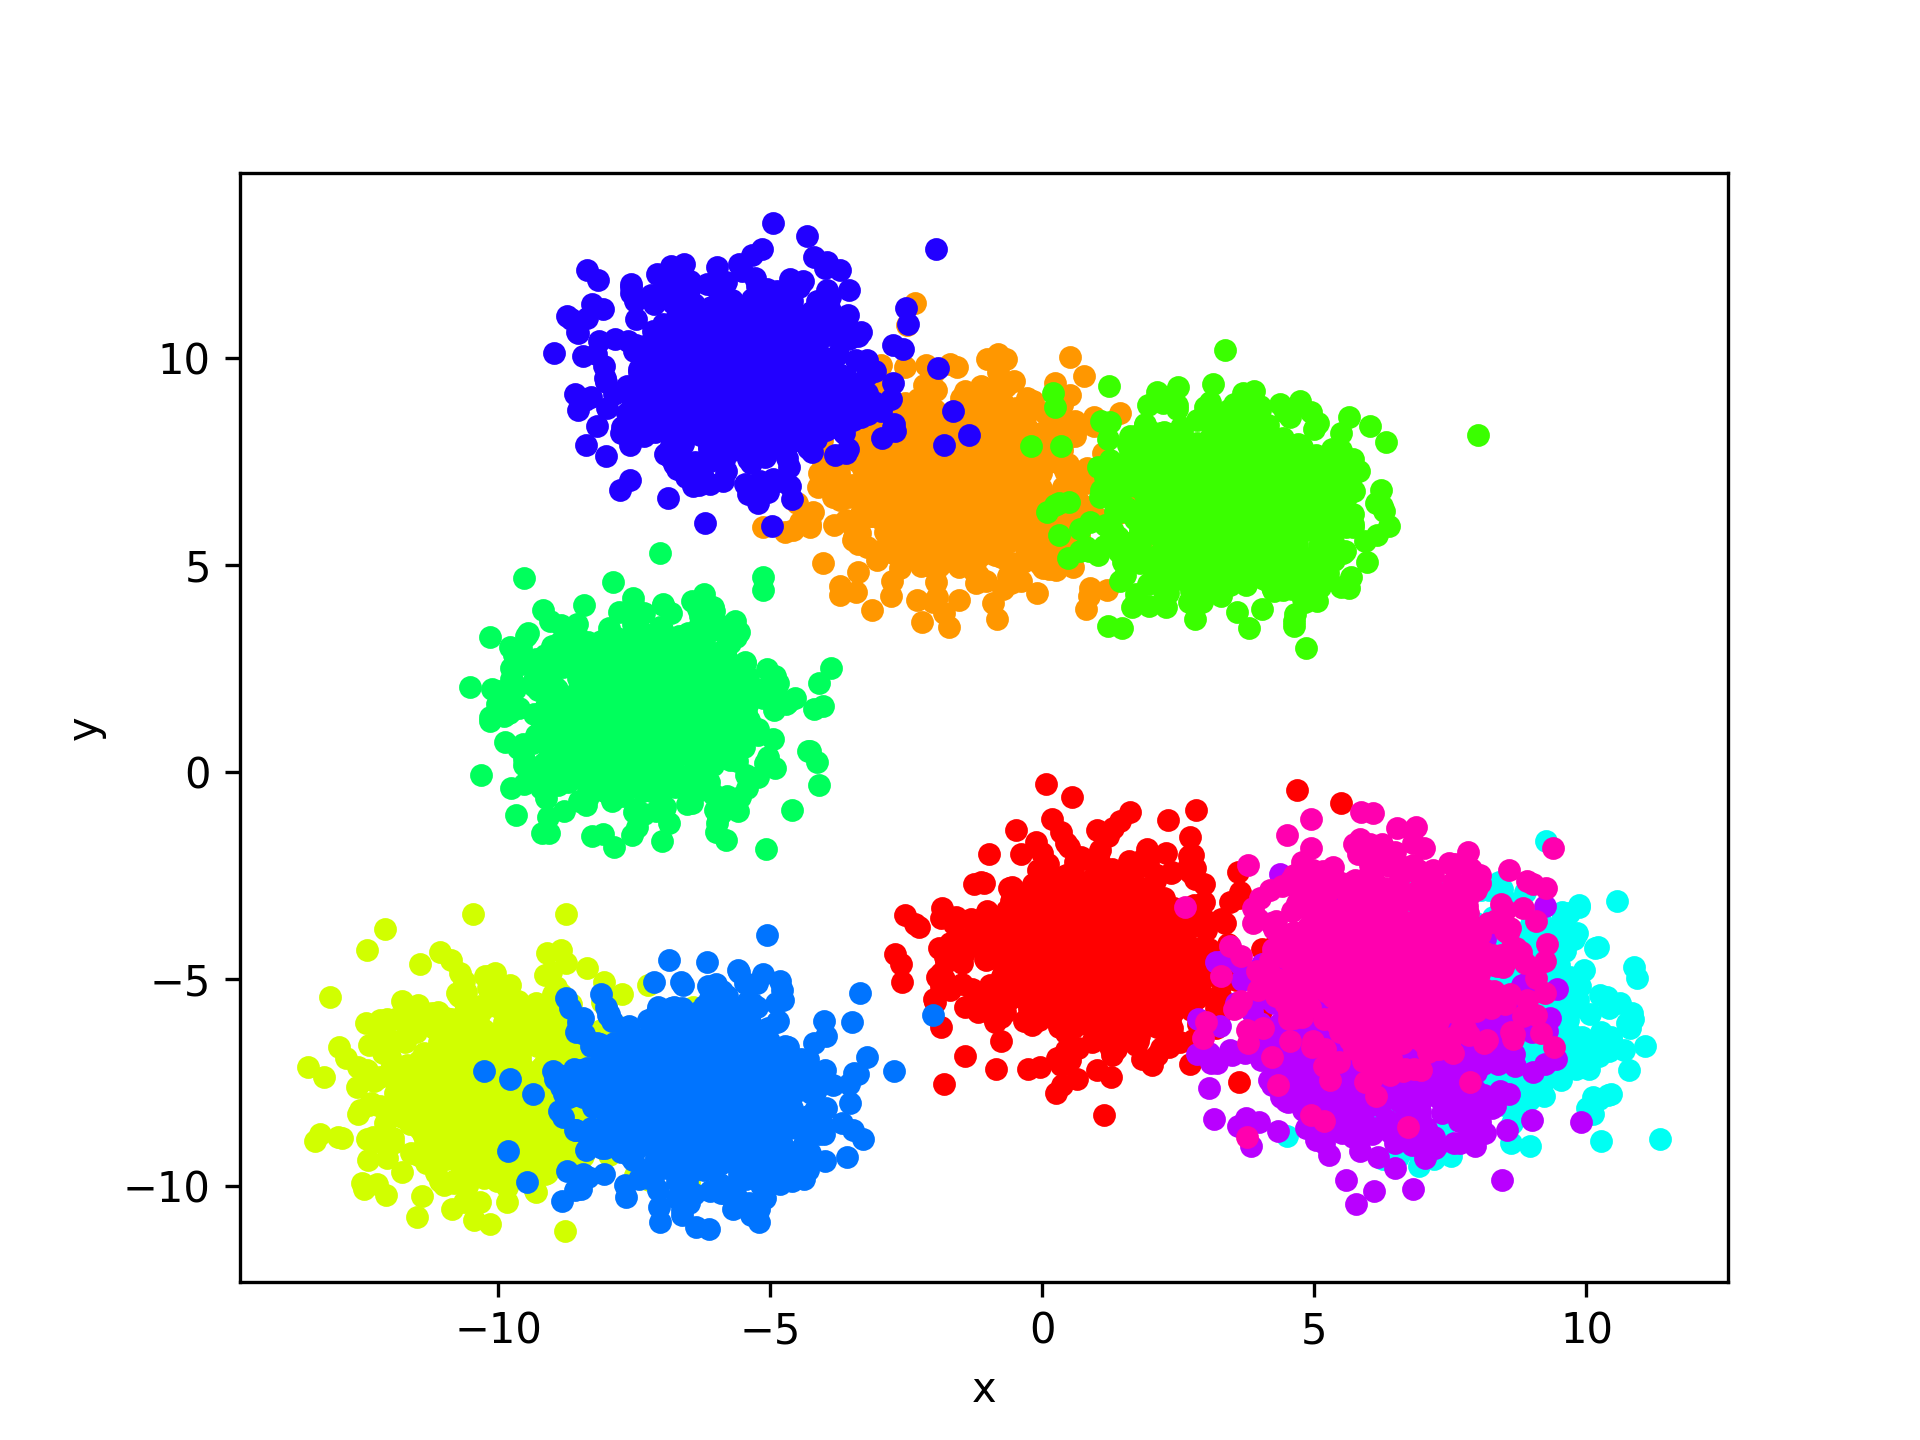

**Результаты:**

**К ближайших соседей:**
- Точность 0,855257
- Длительность 00:00:29.235000

**Метод опорных векторов (линейная классификация, kernel = linear):**
- Точность 0,5609375
- Длительность 00:00:00.84400

**Метод опорных векторов (нелинейная классификация (полиномиальная), kernel = poly):**
- Точность 0,729065
- Длительность 0:00:00,719000

### Выводы

**К ближайших соседей:**
- Способен дать неплохой результат даже при не очень хорошо разделяемых линейно данными;
- Требует большее время для обработки данных;
- Не выгоден при большом размере выборки.

**Метод опорных векторов:**
- Работает быстрее метода к ближайших соседей на всех размерах выборок;
- Точность заметно снижается, если классы линейно плохо разделяются;
- Следует использовать при больших размерах выборки.